# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Harinya Potluri

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [3]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
bs4                0.0.2
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0.10
nest-asyncio       1.6.0
numpy              1.26.4
packaging          24.0
parso              0.8.4
pillow


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [4]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content
response = requests.get(url)
html_content = response.text

# Parse HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Find the article content
article_content = soup.find("div", class_="entry-content")

# Dump the article HTML to a .pkl file
with open("article_content.pkl", "wb") as f:
    pickle.dump(str(article_content), f)

print("Article HTML content dumped to article_content.pkl")


Article HTML content dumped to article_content.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [5]:
import pickle
from bs4 import BeautifulSoup

# Read the HTML content from the .pkl file
with open("article_content.pkl", "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML content
soup = BeautifulSoup(article_html, "html.parser")

# Get the text from the HTML content
text = soup.get_text()

# Print the text
print(text)



When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this w

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
import pickle
import spacy
from collections import Counter

# Load the trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the .pkl file
with open("article_content.pkl", "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML content using spaCy
doc = nlp(article_html)

# Tokenize the document and filter out unwanted tokens (punctuation, stopwords, whitespace)
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_space]

# Count the frequency of each token
token_freq = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print the most common tokens with appropriate labels
print("Most common tokens:")
for token, freq in most_common_tokens:
    print(f"{token}: {freq}")

# Print all tokens and their frequencies with appropriate labels
print("\nToken frequencies:")
for token, freq in token_freq.items():
    print(f"{token}: {freq}")


Most common tokens:
laser: 55
data: 40
headlights: 27
wp: 24
content: 21

Token frequencies:
div: 1
content: 21
p: 11
think: 1
onward: 1
march: 1
automotive: 7
technology: 11
headlights: 27
usually: 1
thing: 2
come: 4
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 1
electric: 1
power: 3
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 5
day: 2
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 4
scene: 1
laser: 55
figure: 4
aria: 4
caption: 8
alignright: 3
medium: 8
wp: 24
data: 40
attachment: 4
comments: 4
image: 14
light: 16
bwm: 7
proto: 1
large: 4
orig: 8
work: 6
width: 4
text: 4
prototype: 1
headlight: 18
assemblies: 1
undergoing: 1
brought: 1
phrase: 1
beams: 4
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eyes: 1
inste

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [8]:
import pickle
import spacy
from collections import Counter

# Load the trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Read the HTML content from the .pkl file
with open("article_content.pkl", "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML content using spaCy
doc = nlp(article_html)

# Extract lemmas, convert to lowercase, and filter out unwanted tokens (punctuation, stopwords, whitespace)
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_space]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the most common lemmas with appropriate labels
print("Most common lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"{lemma}: {freq}")

# Print all lemmas and their frequencies with appropriate labels
print("\nLemma frequencies:")
for lemma, freq in lemma_freq.items():
    print(f"{lemma}: {freq}")


Most common lemmas:
laser: 59
headlight: 45
data: 39
wp: 24
content: 21

Lemma frequencies:
div: 1
content: 21
p: 11
think: 1
onward: 1
march: 1
automotive: 7
technology: 11
headlight: 45
usually: 1
thing: 3
come: 6
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 1
electric: 1
power: 3
mean: 2
thousand: 1
engineer: 2
world: 2
work: 7
improve: 1
state: 2
art: 1
lighting: 5
day: 3
seal: 2
beam: 11
give: 1
way: 4
modern: 2
design: 5
regulation: 1
loosen: 1
bulb: 1
move: 2
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 4
scene: 1
laser: 59
figure: 4
aria: 4
caption: 8
alignright: 3
medium: 8
wp: 24
data: 39
attachment: 4
comment: 4
image: 14
light: 17
bwm: 7
proto: 1
large: 4
orig: 8
width: 4
text: 4
prototype: 1
assembly: 2
undergo: 1
bring: 2
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
inside: 3
blue:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [10]:
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    tokens = sentence.split()
    
    # Count the number of interesting tokens in the sentence
    interesting_token_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    
    # Return the score (number of interesting tokens divided by total number of tokens)
    return interesting_token_count / len(tokens) if len(tokens) > 0 else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Parse the sentence using spaCy
    doc = nlp(sentence)
    
    # Extract lemmas from the sentence and convert to lowercase
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_space]
    
    # Count the number of interesting lemmas in the sentence
    interesting_lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Return the score (number of interesting lemmas divided by total number of lemmas)
    return interesting_lemma_count / len(lemmas) if len(lemmas) > 0 else 0

# First sentence of the article
first_sentence = "Laser headlights aren’t exactly a new technology, but it wasn’t that long ago when a lot of people thought they were a pie-in-the-sky idea."

# Most frequent tokens identified earlier
interesting_tokens = ["laser", "headlights", "technology"]

# Most frequent lemmas identified earlier
interesting_lemmas = ["laser", "headlight", "technology"]

# Score the first sentence using the most frequent tokens
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
print(f"Token score for the first sentence: {token_score}")

# Score the first sentence using the most frequent lemmas
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)
print(f"Lemma score for the first sentence: {lemma_score}")


Token score for the first sentence: 0.08333333333333333
Lemma score for the first sentence: 0.23076923076923078


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

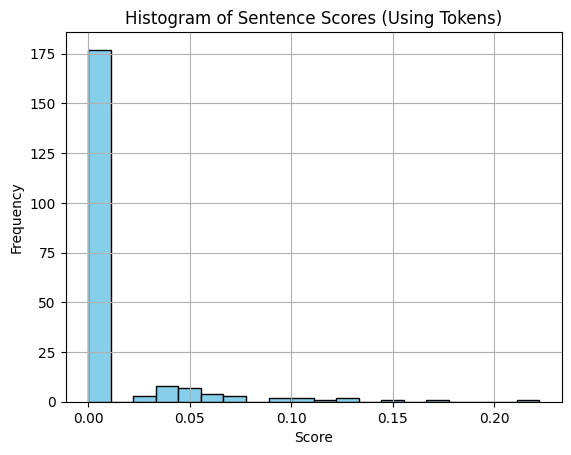

In [11]:
import matplotlib.pyplot as plt

# Function to tokenize sentences
def tokenize_sentences(text):
    sentences = text.split(".")
    return [sentence.strip() for sentence in sentences if sentence.strip()]

# Tokenize the article into sentences
sentences = tokenize_sentences(article_html)

# List to store scores of every sentence
sentence_scores = []

# Calculate scores for every sentence using tokens
for sentence in sentences:
    score = score_sentence_by_token(sentence, interesting_tokens)
    sentence_scores.append(score)

# Plot a histogram of the scores
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentence Scores (Using Tokens)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

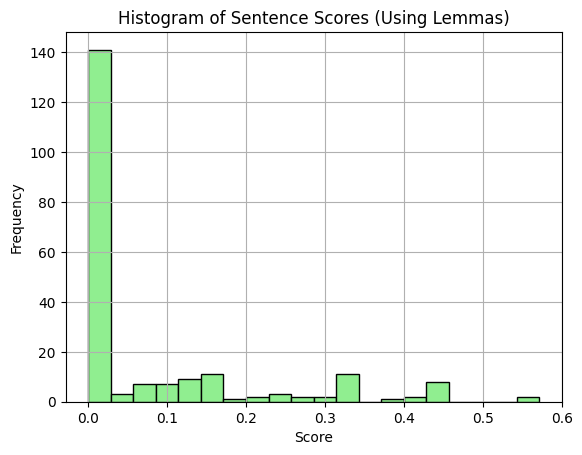

In [12]:
import matplotlib.pyplot as plt

# List to store scores of every sentence
sentence_scores_lemma = []

# Calculate scores for every sentence using lemmas
for sentence in sentences:
    score = score_sentence_by_lemma(sentence, interesting_lemmas)
    sentence_scores_lemma.append(score)

# Plot a histogram of the scores
plt.hist(sentence_scores_lemma, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Sentence Scores (Using Lemmas)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

To change the code to only consider nouns, we can modify the filtering condition in both the score_sentence_by_token and score_sentence_by_lemma functions to check if the token's part of speech (POS) tag is a noun.